Exploring the dataset

In [1]:
# Import required libraries

import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
# Print the first 5 rows of the data

df = pd.read_csv("/Users/madani/Desktop/Big_Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Exploratory Data Analysis

In [3]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

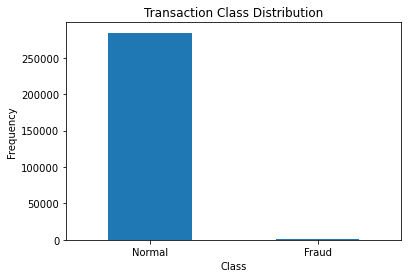

In [6]:
# A display of how imbalanced the dataset is, with only 0.172% being fraudulent transactions.

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraudulent = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Fraudulant transactions: {fraudulent.shape}")
print(f"Non-Fraudulant transactions: {normal.shape}")

Fraudulant transactions: (492, 31)
Non-Fraudulant transactions: (284315, 31)


In [9]:
# Finding out the difference in the transactions' amount from the different classes (0 or 1)

pd.concat([fraudulent.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [10]:
pd.concat([fraudulent.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


/Users/madani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/madani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


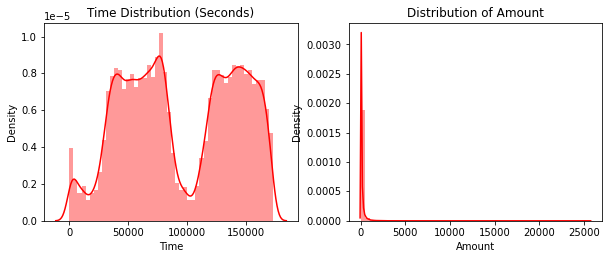

In [11]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(df['Time'], color='red');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='red');

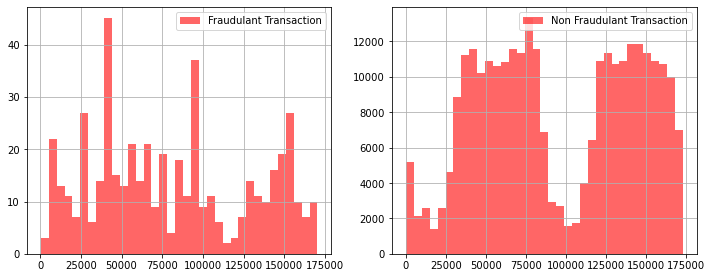

In [12]:
# An attempt to see if fraudulent transactions take place the most during a specific time.

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='red', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

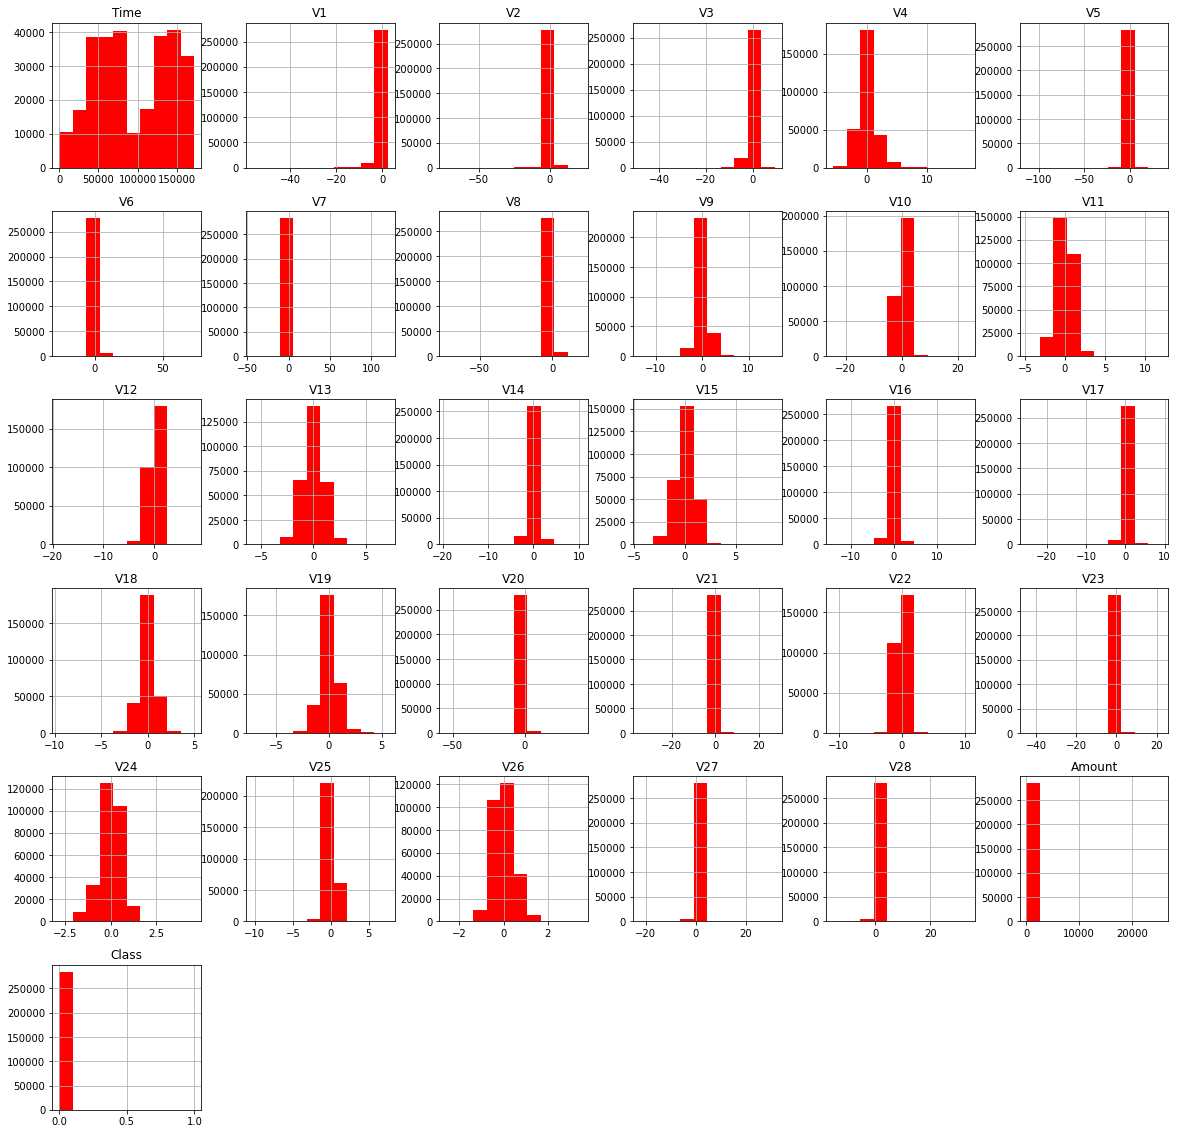

In [13]:
df.hist(figsize=(20, 20), color='red');

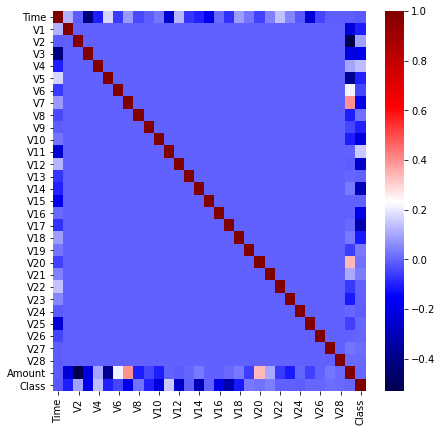

In [14]:
# heatmap to find any high correlations

plt.figure(figsize=(7,7))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show();

Data Preprocessing

In [15]:
# Normalize 'Amount'

from sklearn.preprocessing import StandardScaler
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.24
1,2.69,-0.34
2,378.66,1.16
3,123.50,0.14
4,69.99,-0.07


In [16]:
# Drop unnecessary columns which are 'Amount' & 'Time'

df.drop(["Time", "Amount"], axis = 1, inplace = True) 

In [17]:
# Check that the columns were dropped

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount(Normalized)
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0,0.24
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0,-0.34
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0,1.16
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0,0.14
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0,-0.07


In [18]:
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
# Check that the column 'Class' was dropped

X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount(Normalized)
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0.24
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,-0.34
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,1.16
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0.14
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,-0.07


In [20]:
# Handling the imbalanced dataset
df.sample(frac=1)

fraud_data = df.loc[df['Class'] == 1]
nonfraud_data = df.loc[df['Class'] == 0][0: 492]

normal_distributed = pd.concat([fraud_data, nonfraud_data])

(984, 30)


/Users/madani/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


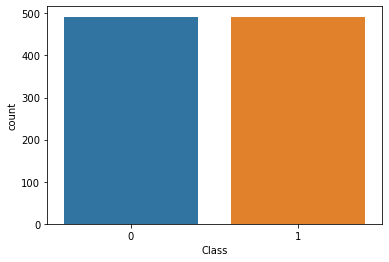

In [21]:
# Display the balanced dataset graphically 

sns.countplot('Class', data=normal_distributed)
print(normal_distributed.shape)

In [22]:
# Dropping the Class in order it as our labels:
y1 = normal_distributed['Class']
normal_distributed.drop(['Class'], axis=1, inplace=True)

In [56]:
# Train_Test_Split 
# Split the dataset into a training set (80%) and the testing set (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normal_distributed, y1, test_size=0.2, random_state=0)

# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [57]:
from sklearn.svm import SVC

Model = SVC(random_state=0)

In [58]:
Model.fit(X_train, y_train)

SVC(random_state=0)

In [59]:
Preds = Model.predict(X_test)

In [60]:
# Accuracy and Loss values

print('The accuracy of the Model is:', "%.5f"% round(accuracy_score(y_test, Preds)*100,5),"%")

The accuracy of the Model is: 97.96954 %


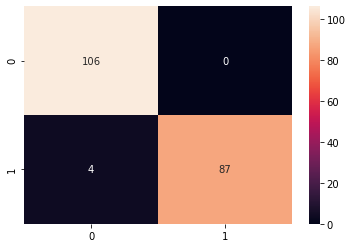

In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = Model.predict(X_test)
y_test = pd.DataFrame(y_test)

cm = confusion_matrix(y_test, y_pred.round())

sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [62]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       106
           1       1.00      0.96      0.98        91

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

